In [17]:
import gym
import pygame
from examples.frozen_lake import FrozenLake
from algorithms.planner import Planner
#from algorithms.optimisticRL import RL
from algorithms.rl import RL
import numpy as np

from gym.envs.toy_text.frozen_lake import generate_random_map
import seaborn as sns
import matplotlib.pyplot as plt
import random
'''

import gym
import pygame
from algorithms.rl import RL
from algorithms.planner import Planner
from examples.test_env import TestEnv
from gym.envs.toy_text.frozen_lake import generate_random_map

class FrozenLake:
    def __init__(self):
        self.env = gym.make('FrozenLake-v1',desc=generate_random_map(size=10), is_slippery=True,render_mode='ansi')


if __name__ == "__main__":

    frozen_lake = FrozenLake()

    # VI/PI
    # V, V_track, pi = Planner(frozen_lake.env.P).value_iteration()
    # V, V_track, pi = Planner(frozen_lake.env.P).policy_iteration()

    # Q-learning
    Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning()

    test_scores = TestEnv.test_env(env=frozen_lake.env, render=True, user_input=False, pi=pi)
'''

'\n\nimport gym\nimport pygame\nfrom algorithms.rl import RL\nfrom algorithms.planner import Planner\nfrom examples.test_env import TestEnv\nfrom gym.envs.toy_text.frozen_lake import generate_random_map\n\nclass FrozenLake:\n    def __init__(self):\n        self.env = gym.make(\'FrozenLake-v1\',desc=generate_random_map(size=10), is_slippery=True,render_mode=\'ansi\')\n\n\nif __name__ == "__main__":\n\n    frozen_lake = FrozenLake()\n\n    # VI/PI\n    # V, V_track, pi = Planner(frozen_lake.env.P).value_iteration()\n    # V, V_track, pi = Planner(frozen_lake.env.P).policy_iteration()\n\n    # Q-learning\n    Q, V, pi, Q_track, pi_track = RL(frozen_lake.env).q_learning()\n\n    test_scores = TestEnv.test_env(env=frozen_lake.env, render=True, user_input=False, pi=pi)\n'

In [6]:
#set numpy random seed
np.random.seed(1)
# set general random seed
random.seed(1)
def generate_frozen_lake_map(size):
    # Initialize the map with all "F" (Frozen) cells
    lake_map = np.full((size, size), 'F', dtype=np.dtype('U1'))

    

    # Set the holes ("H") randomly with a maximum probability of 0.15
    hole_prob = 0.12
    hole_mask = np.random.choice([True, False], size=(size, size), p=[hole_prob, 1 - hole_prob])
    lake_map[hole_mask] = 'H'

    # Set the starting cell to "S"
    lake_map[0, 0] = 'S'

    # Set the goal cell to "G"
    lake_map[-1, -1] = 'G'

    return lake_map

# Generate maps for different sizes
map_10x10 = generate_frozen_lake_map(10)
map_20x20 = generate_frozen_lake_map(20)
map_30x30 = generate_frozen_lake_map(30)
map_40x40 = generate_frozen_lake_map(40)
map_50x50 = generate_frozen_lake_map(50)

custom_map = ['SFFFF','FFFFF','FFFFF','FFFFH','FFFFG']

from gym.envs.registration import register


register(
    id="FrozenLake-MoreEpisodes",
    entry_point="gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv",
    max_episode_steps=500
)



/home/bpopper/miniconda3/envs/assignementMDP/lib/python3.8/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment FrozenLake-MoreEpisodes already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


# 1 - Frozen Lake - convergence plot

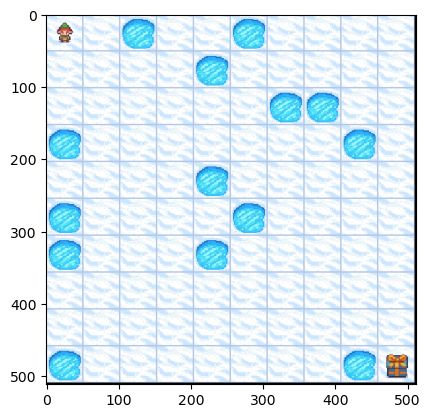

In [23]:
fl=gym.make('FrozenLake-v1',desc=map_10x10, is_slippery=True,render_mode='rgb_array')

MAPSIZE=10


fl.env.reset()

IMG=fl.env.render()


plt.imshow(IMG)
plt.show()




In [24]:

def plotConvergencePlot(V_track,xlim1,xlim2,title):
    avg= np.mean(V_track,axis=1)
    max = np.max(V_track,axis=1)
    std = np.std(V_track,axis=1)
    #calculate V[n]-V[n-1] for each n in array called diff

    differences = V_track[1:,:] - V_track[:-1,:]



    #sum the absolute values of the differences
    diffSums = np.sum(np.abs(differences),axis=1)

    #normalize diffSUms by dividing by its max
    diffSums = diffSums/np.max(diffSums)


    #plot the 3 on a graph
    import matplotlib.pyplot as plt
    plt.plot(avg)
    plt.plot(max)
    plt.plot(std)
    plt.plot(diffSums)
    #legend
    plt.legend(['Average V','Max V','Std V','Sum of abs differences v[n]-v[n-1](rescaled)'])
    plt.xlim(xlim1,xlim2)
    plt.title(title)
    plt.show()


/home/bpopper/gtCode/bettermdptools/bettermdptools/algorithms/planner.py:76: UserWarning: Max iterations reached before convergence.  Check theta and n_iters.  
  warnings.warn("Max iterations reached before convergence.  Check theta and n_iters.  ")


runtime = 0.39 seconds


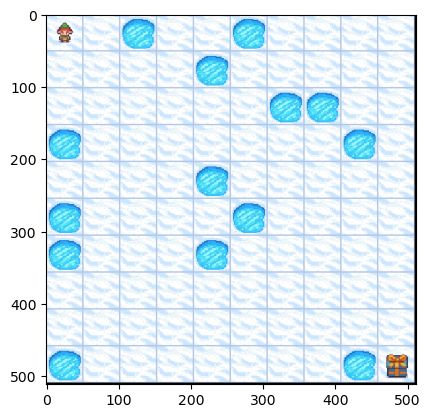

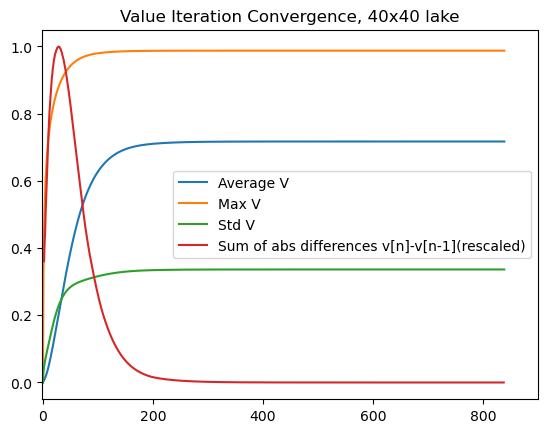

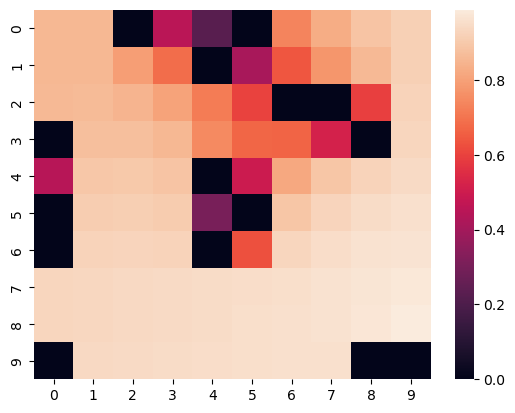

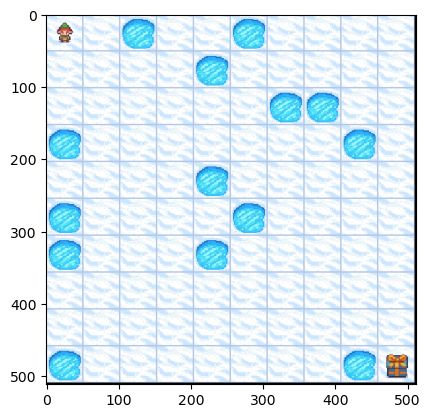

/home/bpopper/miniconda3/envs/assignementMDP/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


score on 1000 runs is 0.97


In [25]:


V_I, V_track_I, pi_I = Planner(fl.env.P).value_iteration(n_iters=840,gamma=0.999,theta=0)

plt.imshow(IMG)
plt.show()
plotConvergencePlot(V_track_I,-2,900,'Value Iteration Convergence, 40x40 lake')

#runtime is 0.09 so 6e-3 sec / iter

#display V_I
sns.heatmap(V_I.reshape(MAPSIZE,MAPSIZE),annot=False)
plt.show()
plt.imshow(IMG)
plt.show()


#get score
from examples.test_env import TestEnv
fdsa=TestEnv.test_env(env=fl.env, render=False, user_input=False, pi=pi_I,n_iters=1000)

print(f"score on 1000 runs is {np.mean(fdsa)}")

runtime = 0.38 seconds


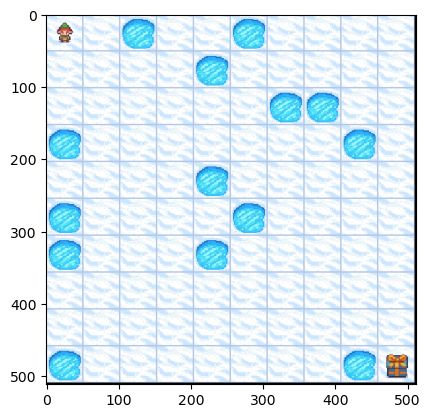

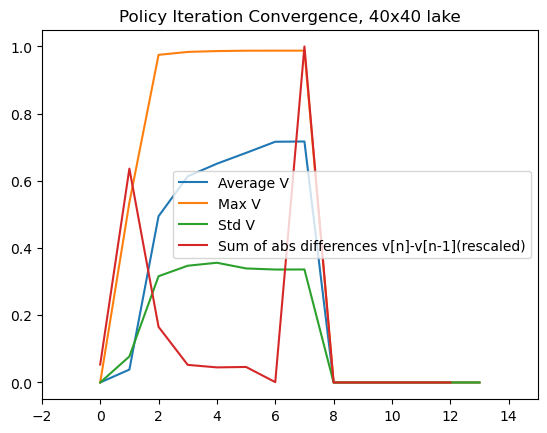

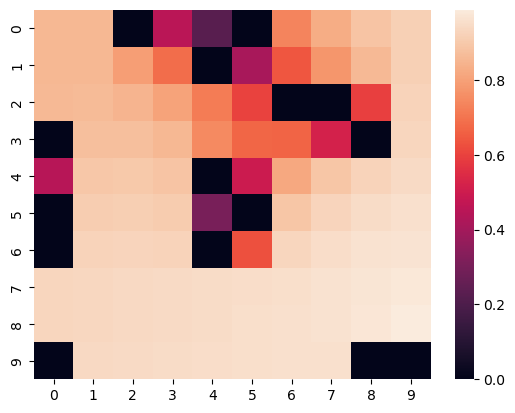

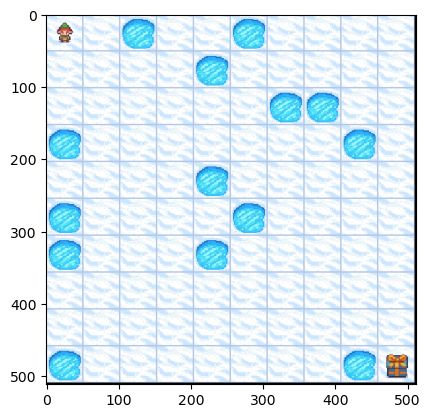

score on 1000 runs is 0.97


In [26]:


V_P, V_track_P, pi_P= Planner(fl.env.P).policy_iteration(n_iters=14,gamma=0.999,theta=1e-8)

plt.imshow(IMG)
plt.show()
plotConvergencePlot(V_track_P,-2,15,'Policy Iteration Convergence, 40x40 lake')

#runtime is 0.09 so 6e-3 sec / iter

#display V_I
sns.heatmap(V_I.reshape(MAPSIZE,MAPSIZE),annot=False)
plt.show()
plt.imshow(IMG)
plt.show()


#get score
from examples.test_env import TestEnv
fdsa=TestEnv.test_env(env=fl.env, render=False, user_input=False, pi=pi_P,n_iters=1000)

print(f"score on 1000 runs is {np.mean(fdsa)}")

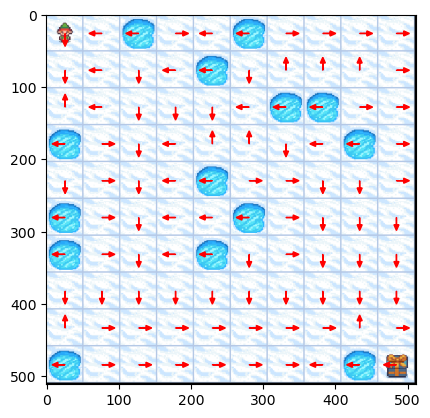

In [31]:
#display the lake and the policy
#open image lake.png with plot

#open 
import matplotlib.image as mpimg


def renderPolicylake(pi_I,size):
    # Load the image
    img = IMG

    # Define the arrow directions based on the provided dictionary
    #0 is left, 1 is down, 2 is right, 3 is up

    arrow_directions = {0: (-1, 0), 1: (0, 1), 2: (1, 0), 3: (0, -1)}

    # Create a figure and axis for the plot
    fig, ax = plt.subplots()

    # Iterate over each block in the image
    block_size = 510/size

    if(MAPSIZE<10):
        block_size = 320/size

    if(MAPSIZE>15):
        block_size = 500/size
    if(MAPSIZE>33):
        block_size = 476/size
    for i in range(size):
        for j in range(size):
            # Calculate the center of the current block
            center_x = (j + 0.5) * block_size
            center_y = (i + 0.5) * block_size

            # Get the arrow direction based on the dictionary
            arrow_direction = arrow_directions.get(pi_I[j+size*i], (0, 0))

            # Plot an arrow at the center of the current block
            ax.arrow(center_x, center_y, arrow_direction[0] * 10, arrow_direction[1] * 10,
                    head_width=7, head_length=8, fc='red', ec='red')

    # Display the image with arrows
    imgplot = ax.imshow(img)
    plt.show()

renderPolicylake(pi_I,MAPSIZE)

In [28]:
#comptue how many states the policy is different between the two policies

def computePolicyDifference(pi1,pi2):
    #np.count the places where they're different
    return np.count_nonzero(pi1-pi2)

#compute the difference between the two policies
policyDifference = computePolicyDifference(np.array([pi_I[i] for i in range(len(pi_I))]),np.array([pi_P[i] for i in range(len(pi_P))]))
print(f"policy difference is {policyDifference} states")

policy difference is 0 states


In [29]:
#get average score with this policy

'''def test_env(env, render=True, n_iters=10, pi=None, user_input=False, convert_state_obs=lambda state, done: state):'''
from examples.test_env import TestEnv
fdsa=TestEnv.test_env(env=fl.env, render=False, user_input=False, pi=pi_I,n_iters=1000)

print(np.mean(fdsa))

0.972


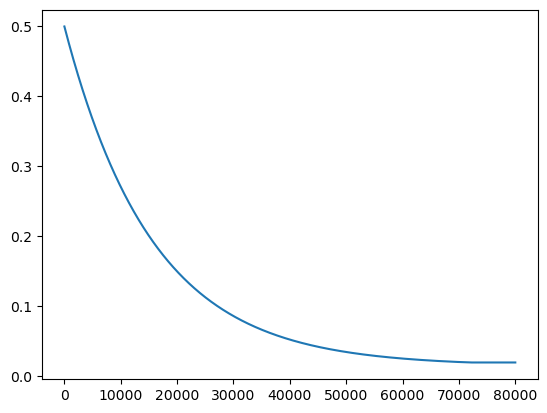

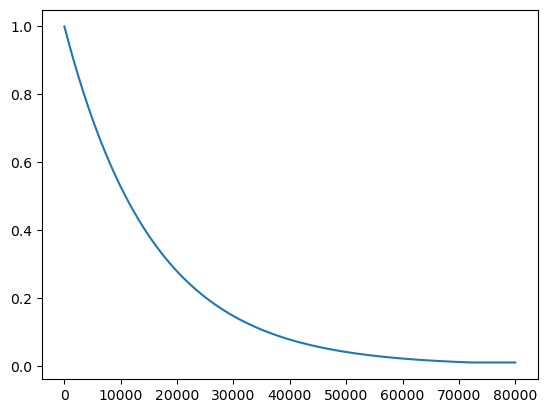

  0%|          | 0/80000 [00:00<?, ?it/s]

Episode: 0
Episode: 10000


 18%|█▊        | 14541/80000 [00:04<00:18, 3635.18it/s]

Episode: 20000


 36%|███▋      | 29082/80000 [00:12<00:23, 2133.95it/s]

Episode: 30000


 49%|████▊     | 38961/80000 [00:23<00:28, 1433.51it/s]

Episode: 40000


 61%|██████▏   | 49164/80000 [00:41<00:35, 876.43it/s] 

Episode: 50000


 72%|███████▏  | 57834/80000 [01:00<00:35, 616.49it/s]

Episode: 60000


 87%|████████▋ | 69343/80000 [01:27<00:22, 473.01it/s]

Episode: 70000


runtime = 112.14 seconds
0.07


In [18]:
#now onto q-learning
"""


        gamma {float}, default = 0.99:
            Discount factor

        init_alpha {float}, default = 0.5:
            Learning rate

        min_alpha {float}, default = 0.01:
            Minimum learning rate

        alpha_decay_ratio {float}, default = 0.5:
            Decay schedule of learing rate for future iterations

        init_epsilon {float}, default = 1.0:
            Initial epsilon value for epsilon greedy strategy.
            Chooses max(Q) over available actions with probability 1-epsilon.

        min_epsilon {float}, default = 0.1:
            Minimum epsilon. Used to balance exploration in later stages.

        epsilon_decay_ratio {float}, default = 0.9:
            Decay schedule of epsilon for future iterations

        n_episodes {int}, default = 10000:
            Number of episodes for the agent"""

Q, V, pi, Q_track, pi_track = RL(fl.env).q_learning(MAPSIZE**2,4,n_episodes=80000,min_alpha=0.02,alpha_decay_ratio=.9,init_epsilon=1,epsilon_decay_ratio=.9,min_epsilon=0.01)


#evaluate pi
fdsa=TestEnv.test_env(env=fl.env, render=False, user_input=False, pi=pi,n_iters=1000)
print(np.mean(fdsa))

In [ ]:
Q.shape

NameError: name 'Q' is not defined

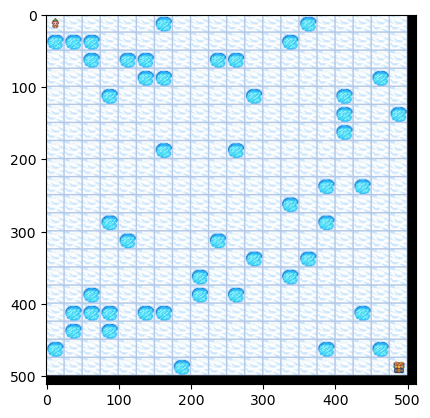

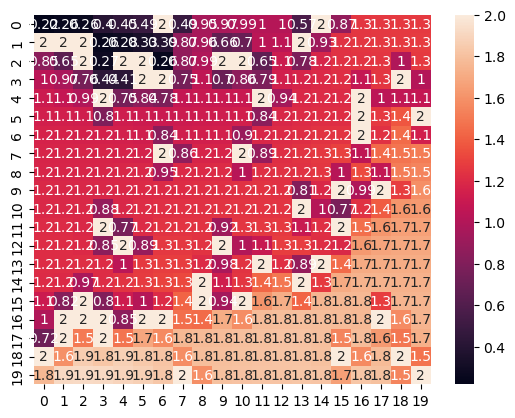

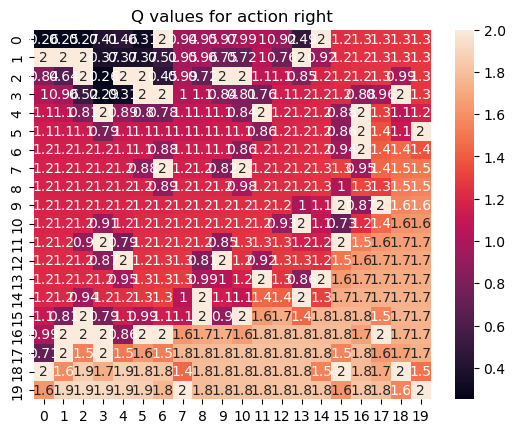

In [ ]:
#display IMG
plt.imshow(IMG)
plt.show()
# 0 is left, 1 is down, 2 is right, 3 is up
#display last state
sns.heatmap(Q.reshape(MAPSIZE,MAPSIZE,4)[:,:,0],annot=True)
plt.show()

#same for [:,:,1] [:,:,2] [:,:,3]
sns.heatmap(Q.reshape(MAPSIZE,MAPSIZE,4)[:,:,2],annot=True)
plt.title('Q values for action right')
plt.show()


In [ ]:
#evaluate Q policy

#pi_track[-1] is the last policy
fdsa=TestEnv.test_env(env=fl.env, render=False, user_input=False, pi=pi_track[-1],n_iters=1000)
print(np.mean(fdsa))

0.576
